In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


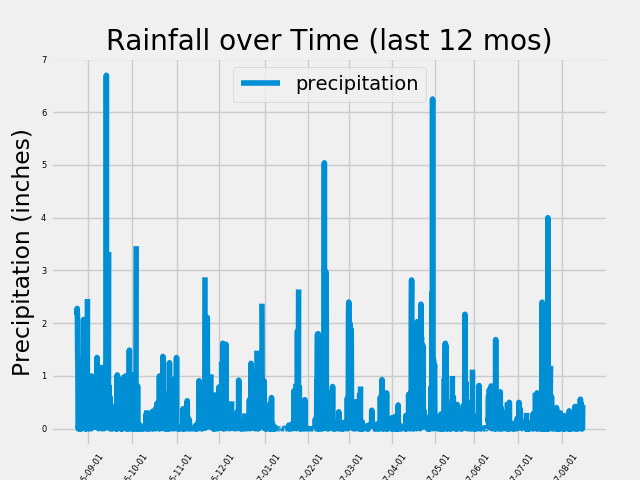

Text(0, 0.5, 'Precipitation (inches)')

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
numRows = session.query(Measurement.date).count()

LastDate = (session.query(Measurement.date).all()[numRows-1])
#print(LastDate)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-24').all()  
#print(len(results))


last12mos_date = [result[0] for result in results]
#print(len(last12mos_date))


last12mos_prcp = [result[1] for result in results]
results_dict = {'date': last12mos_date, 'precipitation': last12mos_prcp}



# Save the query results as a Pandas DataFrame and set the index to the date column
df_results = pd.DataFrame(results_dict, columns=['date', 'precipitation'])
df_results = df_results.set_index('date', inplace=False)

# Sort the dataframe by date
df_results.sort_values('date', ascending=True,inplace=True)
#print(df_results)


df_orig = df_results.reset_index()


ls_dates = ['2016-09-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01']
ls_xticks= []
for date in ls_dates:
    ls_found_date = df_orig.loc[df_orig['date'] == date].index.tolist()
    ls_xticks.append(ls_found_date[0])

#df_results = df_results.set_index('date', inplace=False)
ls_yticks = [1.0, 2.0, 3.0,4.0,5.0,6.0,7.0]

# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
fig = df_results.plot(kind='line', xticks=ls_xticks, fontsize=6,rot=55, title="Rainfall over Time (last 12 mos)")
fig.set_xlabel("Date")
fig.set_ylabel("Precipitation (inches)")


#fig, ax = plt.subplots()
#ax.plot(last12mos_date, last12mos_prcp)
#ax.set_xlabel("date")
#ax.set_ylabel("precip")
#ax.set_yticks(range(0, 5))
#ax.set_yticklabels([0.0,1.0,2.0,3.0,4.0,5.0])
#ax.set_title("rain")
#fig.tight_layout()
#plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_results.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# How many stations are available in this dataset?
#results = session.query(Station.station).group_by(Station.station).all()  
#print(len(results))

results = session.query(Measurement.station).group_by(Measurement.station).count()
print("There are " + str(results) + " weather stations in this dataset")

There are 9 weather stations in this dataset


In [40]:
# What are the most active stations?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(results)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [41]:
#Which station has the highest number of observations?
max_station = results[0][0]
print("Station " + str(max_station) + " has the highest number of observations in this dataset")

Station USC00519281 has the highest number of observations in this dataset


360
            tobs
date            
2016-08-24  79.0
2016-08-25  80.0
2016-08-26  79.0
2016-08-27  77.0
2016-08-28  78.0
tobs    60.0
dtype: float64
tobs    87.0
dtype: float64


<IPython.core.display.Javascript object>


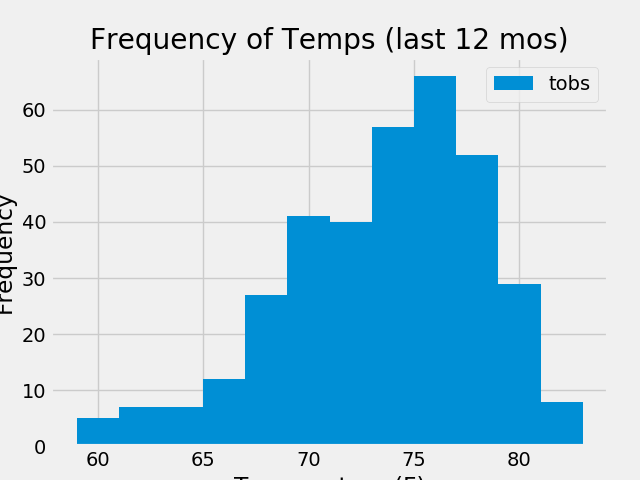

Text(0, 0.5, 'Frequency')

In [68]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

from sqlalchemy import and_

#results_tobs = session.query(Measurement.date, Measurement.tobs).filter(and_((Measurement.date>='2016-08-24'),(Measurement.station==max_station))).all()  
results_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.date>='2016-08-24').order_by(func.count(Measurement.tobs).desc()).all()                                                                     

max_tobs_stn = results_tobs[0][0]
#print(max_tobs_stn)

results_tobs_stn = session.query(Measurement.date, Measurement.tobs).filter(and_((Measurement.date>='2016-08-24'),(Measurement.station==max_tobs_stn))).all()
#print(results_tobs_stn)



last12mos_date = [result[0] for result in results_tobs_stn]
print(len(last12mos_date))

last12mos_tobs = [result[1] for result in results_tobs_stn]
results_dict_tobs = {'date': last12mos_date, 'tobs': last12mos_tobs}

# Save the query results as a Pandas DataFrame and set the index to the date column
df_results_tobs = pd.DataFrame(results_dict_tobs, columns=['date', 'tobs'])
df_results_tobs = df_results_tobs.set_index('date', inplace=False)
print(df_results_tobs.head())

print(df_results_tobs.min())
print(df_results_tobs.max())


fig = df_results.plot(kind='hist',bins=12,title="Frequency of Temps (last 12 mos)")
fig.set_xlabel("Temperature (F)")
fig.set_ylabel("Frequency")




## Optional Challenge Assignment

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
